### Ce script permet de:
- analyser la richesse specifique au cours des années
- frequence d'observation par espece
- effectif des tops especes par jours
- 

## Packages

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pylab as plt

import statsmodels.api as sm
import datetime

## Open Data 

In [2]:
#Open cleaned data for analysis
data_day = pd.read_csv('../raw_data/Trektellen/tableaux_finaux/cleaned_data_day_for_analysis.csv')
data_hour = pd.read_csv('../raw_data/Trektellen/tableaux_finaux/data_hour_for_analysis.csv')

## Species richness over the years

### Direction1, Direction2, local, total richesse spécifique par an

In [4]:
data_dir1 = data_day.loc[data_day['direction1'] > 0]
data_dir2 = data_day.loc[data_day['direction2'] > 0]
data_local = data_day.loc[data_day['maxlocal'] > 0]

species_richness_dir1 = data_dir1.groupby('year')['species'].nunique().reset_index(name='Migration nord-sud')
species_richness_dir2 = data_dir2.groupby('year')['species'].nunique().reset_index(name='Migration sud-nord')
species_richness_local = data_local.groupby('year')['species'].nunique().reset_index(name='Local')
species_richness_total = data_day.groupby('year')['species'].nunique().reset_index(name='Total')

species_richness = species_richness_dir1.merge(species_richness_dir2, on='year', how='outer').merge(species_richness_local, on='year', how='outer').merge(species_richness_total, on='year', how='outer')

species_richness = species_richness.melt(id_vars=['year'],
                    value_vars=['Total', 'Migration nord-sud', 'Migration sud-nord', 'Local'],
                    var_name='Statut',
                    value_name='Richesse spécifique')

species_richness.to_csv('../figures/richesse_specifique/richesse_specifique_par_an_par_statut.csv', index = False)

species_richness

,year,Statut,Richesse spécifique
0,2016,Total,42.0
1,2017,Total,67.0
2,2018,Total,39.0
3,2019,Total,56.0
4,2020,Total,84.0
5,2021,Total,131.0
6,2022,Total,132.0
7,2023,Total,119.0
8,2016,Migration nord-sud,35.0
9,2017,Migration nord-sud,59.0


In [1]:
richesse_specifique = sns.barplot(data=species_richness, x='year', y='Richesse spécifique', hue='Statut').set(xlabel ="Année", ylabel = "Richesse spécifique", title ="Richesse spécifique par année et statut")

plt.savefig('../figures/richesse_specifique/richesse_specifique_par_an_par_statut.png')

NameError: name 'sns' is not defined

## Frequence d'observations des especes locales par année

In [6]:
# somme du nombre de jours observation par espece locale par an
data_local.head(1)

,date_dt,year,month,day,start_time,stop_time,day_duration,observers,observersactive,observerspresent,...,cloudcover,cloudheight,precipitation,perc_duration,visibility,temperature,n_observers,abundance_dir_1_per_observer,abundance_dir_2_per_observer,abundance_local_per_observer
0,2016-07-18,2016,7,18,06:49:00,16:39:00,9.833333,"MR, LDG, MC, Mijo Gariou",4.0,NaN,...,1.0,NaN,NaN,NaN,10000.0,21.0,4,0.0,0.0,0.25


In [7]:
freq_locales = data_local.groupby(['year', 'species'])['date_dt'].nunique().reset_index(name='Frequence')
freq_locales = freq_locales.sort_values(by='Frequence', ascending=False)
top_liste_freq_locales = freq_locales.head(100).species.unique()
top_liste_freq_locales

array(['corvidé spec.', 'Milan royal', 'Vautour fauve', 'Grand Corbeau',
       'Gypaète barbu', 'Buse variable', 'Linotte mélodieuse',
       'Vautour percnoptère', 'Corneille noire', 'Faucon crécerelle',
       'Circaète Jean-le-Blanc', 'Aigle royal', 'Pie bavarde',
       'Aigle botté', 'Bergeronnette grise',
       'Faucon crécerelle / Faucon crécerellette', 'Épervier d’Europe',
       'Pinson des arbres', 'Rougequeue noir', 'Pipit spioncelle',
       'Faucon hobereau', 'Bruant jaune'], dtype=object)

In [8]:
top_locaux = freq_locales.loc[freq_locales['species'].isin(top_liste_freq_locales)]
top_locaux.rename(columns={'year':'Année'}, inplace=True)

top_locaux.to_csv('../figures/locaux/frequence_top_especes_locales_par_an.csv', index = False)

top_locaux

/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_33693/1947099234.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_locaux.rename(columns={'year':'Année'}, inplace=True)


,Année,species,Frequence
389,2023,corvidé spec.,81
354,2023,Milan royal,77
384,2023,Vautour fauve,75
344,2023,Grand Corbeau,70
347,2023,Gypaète barbu,69
...,...,...,...
115,2020,Pinson des arbres,18
24,2017,Faucon hobereau,7
50,2018,Épervier d’Europe,6
7,2016,Faucon hobereau,4


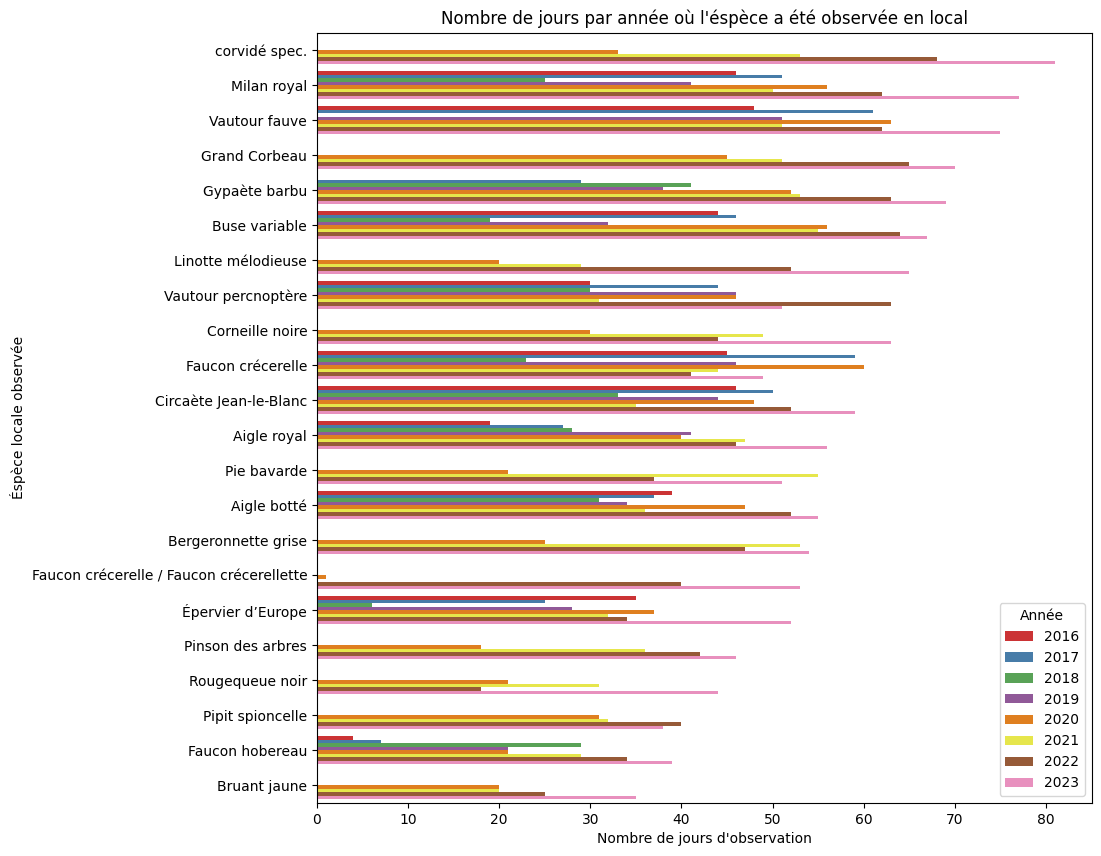

In [9]:
# Figure all years
plt.figure(figsize=(10,10))

freq_locaux_plot = sns.barplot(data=top_locaux, x='Frequence', y='species', hue='Année', palette='Set1')
freq_locaux_plot.set(xlabel ="Nombre de jours d'observation", ylabel = "Éspèce locale observée", title ="Nombre de jours par année où l'éspèce a été observée en local");

fig = freq_locaux_plot.get_figure()
fig.savefig('../figures/locaux/frequence_observation_top_locaux_par_an.png')


## Effectif Milan noir, milan royal, cigogne blanche, cigogne noire, épervier d'europe, bondrée apivore par JOUR

In [22]:
liste_especes = data_dir1[data_dir1['species'].isin(['Milan noir', 'Bondrée apivore', 'Milan royal','Cigogne blanche', 'Épervier d’Europe', 'Cigogne noire'])]
liste_especes.head(2)

,date_dt,year,month,day,start_time,stop_time,day_duration,observers,observersactive,observerspresent,...,cloudcover,cloudheight,precipitation,perc_duration,visibility,temperature,n_observers,abundance_dir_1_per_observer,abundance_dir_2_per_observer,abundance_local_per_observer
6,2016-07-18,2016,7,18,06:49:00,16:39:00,9.833333,"MR, LDG, MC, Mijo Gariou",4.0,NaN,...,1.0,NaN,NaN,NaN,10000.0,21.0,4,47.0,0.0,0.0
13,2016-07-19,2016,7,19,06:36:00,16:47:00,10.183333,"MR, QD, LDG, GS",4.0,NaN,...,2.0,NaN,NaN,NaN,12000.0,34.0,4,42.5,0.0,0.0


## Phénologie de passage - pic de migration pour les 6 especes

In [23]:
species_sum_day = liste_especes.groupby(['year', 'date_dt', 'species'])['direction1'].sum().reset_index()

species_sum_day.loc[:, 'date_dt'] = pd.to_datetime(species_sum_day['date_dt'])

species_sum_day['day_month'] = species_sum_day['date_dt'].dt.strftime('%d-%B')

# Convert month to French
month_translation = {
    'June': 'juin', 'July': 'juil', 'August': 'août', 'September': 'sept', 'October': 'oct', 'November': 'novembre'
}

species_sum_day['day_month'] = species_sum_day['day_month'].replace(month_translation, regex=True)
species_sum_day = species_sum_day.sort_values(by='date_dt')


/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_33693/746442482.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  species_sum_day.loc[:, 'date_dt'] = pd.to_datetime(species_sum_day['date_dt'])


In [24]:
species_sum_day.head()

,year,date_dt,species,direction1,day_month
0,2016,2016-07-18,Milan noir,188.0,18-juil
1,2016,2016-07-19,Milan noir,170.0,19-juil
2,2016,2016-07-20,Bondrée apivore,1.0,20-juil
3,2016,2016-07-23,Cigogne noire,1.0,23-juil
4,2016,2016-07-23,Milan noir,1522.0,23-juil


In [81]:
# milan royal
species_sum_day[(species_sum_day['species'] == 'Milan royal')].day_month.unique()

array(['02-août', '06-août', '08-août', '12-août', '24-août', '26-août',
       '27-août', '02-sept', '04-sept', '06-sept', '15-sept', '21-sept',
       '22-sept', '27-sept', '28-sept', '04-oct', '13-août', '21-août',
       '13-sept', '16-sept', '17-sept', '19-sept', '20-sept', '23-sept',
       '24-sept', '26-sept', '29-sept', '05-oct', '08-oct', '23-juil',
       '30-juil', '29-août', '08-sept', '10-sept', '11-sept', '25-sept',
       '30-sept', '09-oct', '13-oct', '19-juil', '29-juil', '03-août',
       '16-août', '07-sept', '09-sept', '03-oct', '07-oct', '10-oct',
       '27-juil', '31-juil', '31-août', '01-sept', '03-sept', '09-août',
       '10-août', '11-août', '14-août', '20-août', '23-août', '25-août',
       '30-août', '05-sept', '12-sept', '01-oct', '02-oct', '06-oct',
       '11-oct', '12-oct', '18-juil', '21-juil', '24-juil', '01-août',
       '04-août', '07-août', '28-août', '14-sept', '18-sept', '05-août',
       '15-août', '17-août', '18-août', '19-août', '22-août'],
 

In [25]:
species_sum_day.day_month.unique()

array(['18-juil', '19-juil', '20-juil', '23-juil', '24-juil', '25-juil',
       '26-juil', '27-juil', '28-juil', '29-juil', '30-juil', '01-août',
       '02-août', '03-août', '05-août', '06-août', '07-août', '08-août',
       '09-août', '10-août', '11-août', '12-août', '13-août', '14-août',
       '15-août', '16-août', '17-août', '19-août', '21-août', '22-août',
       '23-août', '24-août', '25-août', '26-août', '27-août', '28-août',
       '30-août', '31-août', '01-sept', '02-sept', '03-sept', '04-sept',
       '05-sept', '06-sept', '07-sept', '09-sept', '10-sept', '11-sept',
       '12-sept', '13-sept', '15-sept', '20-sept', '21-sept', '22-sept',
       '27-sept', '28-sept', '03-oct', '04-oct', '21-juil', '22-juil',
       '31-juil', '04-août', '18-août', '20-août', '29-août', '08-sept',
       '16-sept', '17-sept', '19-sept', '23-sept', '24-sept', '26-sept',
       '29-sept', '05-oct', '08-oct', '14-sept', '25-sept', '30-sept',
       '09-oct', '13-oct', '07-oct', '10-oct', '18-sept

In [82]:
sorted_selected_dates_2016_2020 = [

    '15-juil', '16-juil', '17-juil', '18-juil', '19-juil',
    '20-juil', '21-juil', '22-juil', '23-juil', '24-juil', '25-juil', '26-juil',
    '27-juil', '28-juil', '29-juil', '30-juil', '31-juil',

    '01-août', '02-août',
    '03-août', '04-août', '05-août', '06-août', '07-août', '08-août', '09-août',
    '10-août', '11-août', '12-août', '13-août', '14-août', '15-août', '16-août',
    '17-août', '18-août', '19-août', '20-août', '21-août', '22-août', '23-août',
    '24-août', '25-août', '26-août', '27-août', '28-août', '29-août', '30-août',
    '31-août',

    '01-sept', '02-sept', '03-sept', '04-sept', '05-sept', '06-sept',
    '07-sept', '08-sept', '09-sept', '10-sept', '11-sept', '12-sept', '13-sept',
    '14-sept', '15-sept'

]

sorted_selected_dates_2021_2023 = [

    '15-juil', '16-juil', '17-juil', '18-juil', '19-juil',
    '20-juil', '21-juil', '22-juil', '23-juil', '24-juil', '25-juil', '26-juil',
    '27-juil', '28-juil', '29-juil', '30-juil', '31-juil',

    '01-août', '02-août',
    '03-août', '04-août', '05-août', '06-août', '07-août', '08-août', '09-août',
    '10-août', '11-août', '12-août', '13-août', '14-août', '15-août', '16-août',
    '17-août', '18-août', '19-août', '20-août', '21-août', '22-août', '23-août',
    '24-août', '25-août', '26-août', '27-août', '28-août', '29-août', '30-août',
    '31-août',

    '01-sept', '02-sept', '03-sept', '04-sept', '05-sept', '06-sept',
    '07-sept', '08-sept', '09-sept', '10-sept', '11-sept', '12-sept', '13-sept',
    '14-sept', '15-sept', '16-sept', '17-sept', '18-sept', '19-sept', '20-sept',
    '21-sept', '22-sept', '23-sept', '24-sept', '25-sept', '26-sept', '27-sept',
    '28-sept', '29-sept', '30-sept'

]

all_dates_milan_royal  = [
    '18-juil', '19-juil', '21-juil', '23-juil', '27-juil', '29-juil', '30-juil',

    '01-août', '02-août', '03-août', '04-août', '05-août', '06-août', '07-août',
    '08-août', '09-août', '10-août', '11-août', '12-août', '13-août', '14-août',
    '15-août', '16-août', '17-août', '18-août', '19-août', '20-août', '21-août',
    '23-août', '24-août', '25-août', '26-août', '27-août', '28-août', '29-août',
    '30-août', '31-août',

    '01-sept', '02-sept', '03-sept', '04-sept', '05-sept',
    '06-sept', '07-sept', '08-sept', '09-sept', '10-sept', '11-sept', '12-sept',
    '13-sept', '14-sept', '15-sept', '16-sept', '17-sept', '18-sept', '19-sept',
    '20-sept', '21-sept', '22-sept', '23-sept', '24-sept', '25-sept', '26-sept',
    '27-sept', '28-sept', '29-sept', '30-sept',

    '01-oct', '02-oct', '03-oct',
    '04-oct', '05-oct', '06-oct', '07-oct', '08-oct', '09-oct', '10-oct',
    '11-oct', '12-oct', '13-oct'
]


In [83]:
# 2016 - 2020 ####
# Filter DataFrame
species_sum_day_2026_2020 = species_sum_day[species_sum_day['year'].isin([2016, 2017, 2018, 2019, 2020])]
species_sum_day_2026_2020 = species_sum_day_2026_2020[species_sum_day_2026_2020['day_month'].isin(sorted_selected_dates_2016_2020)]
# Create a categorical type with the desired order
species_sum_day_2026_2020['day_month'] = pd.Categorical(species_sum_day_2026_2020['day_month'], categories=sorted_selected_dates_2016_2020, ordered=True)
# Sort DataFrame by the categorical column
sorted_species_sum_day_2026_2020 = species_sum_day_2026_2020.sort_values('day_month')
sorted_species_sum_day_2026_2020.rename(columns={'year':'Année'}, inplace=True)
# 2021 - 2023 ####
# Filter DataFrame
species_sum_day_2021_2023 = species_sum_day[species_sum_day['year'].isin([2021, 2022, 2023])]
species_sum_day_2021_2023 = species_sum_day_2021_2023[species_sum_day_2021_2023['day_month'].isin(sorted_selected_dates_2021_2023)]
# Create a categorical type with the desired order
species_sum_day_2021_2023['day_month'] = pd.Categorical(species_sum_day_2021_2023['day_month'], categories=sorted_selected_dates_2021_2023, ordered=True)
# Sort DataFrame by the categorical column
sorted_species_sum_day_2021_2023 = species_sum_day_2021_2023.sort_values('day_month')
sorted_species_sum_day_2021_2023.rename(columns={'year':'Année'}, inplace=True)

# milan royal
milan_royal = species_sum_day[species_sum_day['species'].isin(['Milan royal'])]
# Filter DataFrame
milan_royal = milan_royal[milan_royal['day_month'].isin(all_dates_milan_royal)]
# Create a categorical type with the desired order
milan_royal['day_month'] = pd.Categorical(milan_royal['day_month'], categories=all_dates_milan_royal, ordered=True)
# Sort DataFrame by the categorical column
milan_royal = milan_royal.sort_values('day_month')
milan_royal.rename(columns={'year':'Année'}, inplace=True)
milan_royal

,Année,date_dt,species,direction1,day_month
1205,2022,2022-07-18,Milan royal,1.0,18-juil
572,2019,2019-07-19,Milan royal,1.0,19-juil
1211,2022,2022-07-21,Milan royal,5.0,21-juil
390,2018,2018-07-23,Milan royal,1.0,23-juil
1454,2023,2023-07-23,Milan royal,1.0,23-juil
...,...,...,...,...,...
1727,2023,2023-10-12,Milan royal,39.0,12-oct
1202,2021,2021-10-13,Milan royal,835.0,13-oct
1447,2022,2022-10-13,Milan royal,241.0,13-oct
568,2018,2018-10-13,Milan royal,82.0,13-oct


In [40]:
sorted_species_sum_day = pd.concat([sorted_species_sum_day_2026_2020, sorted_species_sum_day_2021_2023])
sorted_species_sum_day

,Année,date_dt,species,direction1,day_month
0,2016,2016-07-18,Milan noir,188.0,18-juil
765,2020,2020-07-18,Milan noir,79.0,18-juil
181,2017,2017-07-18,Milan noir,113.0,18-juil
384,2018,2018-07-18,Milan noir,227.0,18-juil
570,2019,2019-07-18,Milan noir,183.0,18-juil
...,...,...,...,...,...
1690,2023,2023-09-30,Milan royal,383.0,30-sept
1417,2022,2022-09-30,Cigogne noire,4.0,30-sept
1418,2022,2022-09-30,Milan royal,108.0,30-sept
1166,2021,2021-09-30,Épervier d’Europe,1.0,30-sept


### Milan noir

In [96]:
milan_noir = sorted_species_sum_day[sorted_species_sum_day['species'].isin(['Milan noir'])]
milan_noir.species.unique()

array(['Milan noir'], dtype=object)

In [97]:
milan_noir['Smoothed_direction1'] = milan_noir.groupby('Année')['direction1'].transform(lambda x: x.rolling(window=65, min_periods=1).mean())
milan_noir

/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_33693/2251410995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  milan_noir['Smoothed_direction1'] = milan_noir.groupby('Année')['direction1'].transform(lambda x: x.rolling(window=65, min_periods=1).mean())


,Année,date_dt,species,direction1,day_month,Smoothed_direction1
0,2016,2016-07-18,Milan noir,188.0,18-juil,188.000000
765,2020,2020-07-18,Milan noir,79.0,18-juil,79.000000
181,2017,2017-07-18,Milan noir,113.0,18-juil,113.000000
384,2018,2018-07-18,Milan noir,227.0,18-juil,227.000000
570,2019,2019-07-18,Milan noir,183.0,18-juil,183.000000
...,...,...,...,...,...,...
1413,2022,2022-09-26,Milan noir,4.0,26-sept,857.783333
1674,2023,2023-09-27,Milan noir,1.0,27-sept,1308.633333
1684,2023,2023-09-29,Milan noir,6.0,29-sept,1287.278689
1689,2023,2023-09-30,Milan noir,29.0,30-sept,1266.983871


In [98]:
milan_noir['day_float'] = np.linspace(1, len(milan_noir), num=len(milan_noir))
milan_noir

/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_33693/2207553700.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  milan_noir['day_float'] = np.linspace(1, len(milan_noir), num=len(milan_noir))


,Année,date_dt,species,direction1,day_month,Smoothed_direction1,day_float
0,2016,2016-07-18,Milan noir,188.0,18-juil,188.000000,1.0
765,2020,2020-07-18,Milan noir,79.0,18-juil,79.000000,2.0
181,2017,2017-07-18,Milan noir,113.0,18-juil,113.000000,3.0
384,2018,2018-07-18,Milan noir,227.0,18-juil,227.000000,4.0
570,2019,2019-07-18,Milan noir,183.0,18-juil,183.000000,5.0
...,...,...,...,...,...,...,...
1413,2022,2022-09-26,Milan noir,4.0,26-sept,857.783333,423.0
1674,2023,2023-09-27,Milan noir,1.0,27-sept,1308.633333,424.0
1684,2023,2023-09-29,Milan noir,6.0,29-sept,1287.278689,425.0
1689,2023,2023-09-30,Milan noir,29.0,30-sept,1266.983871,426.0


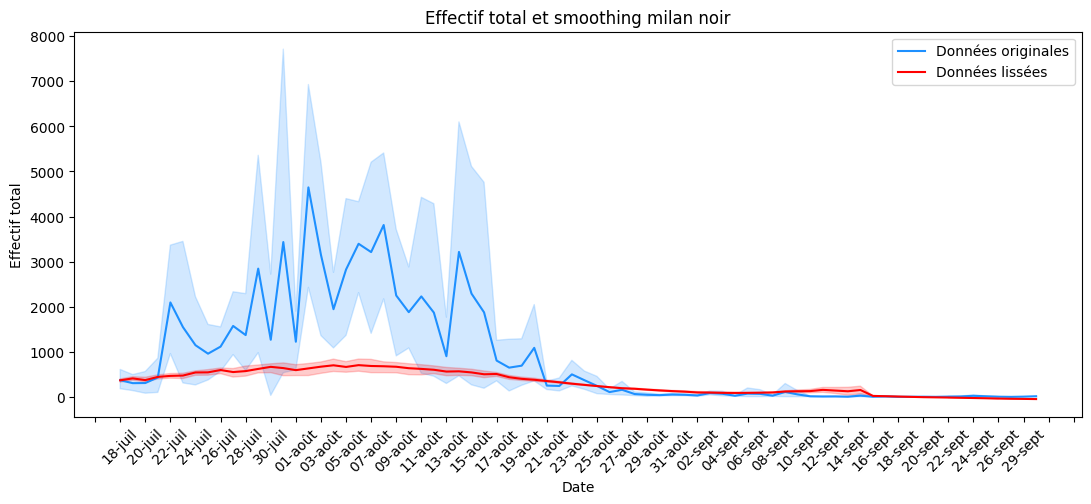

In [99]:
x = np.array(milan_noir.day_float)
y = np.array(milan_noir.direction1)
z = sm.nonparametric.lowess(y, x, frac= 1./3, it=3)

# Figure all years
plt.figure(figsize=(13, 5))
milan_noir_plot = sns.lineplot(x=milan_noir['day_month'], y=y, color='dodgerblue', label='Données originales')
sns.lineplot(x=milan_noir['day_month'], y=z[:, 1], color='red', label='Données lissées')

# Add labels and a title
plt.xlabel('Date')
plt.xticks(rotation=45);
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
plt.ylabel('Effectif total')
plt.title('Effectif total et smoothing milan noir')
plt.legend()

# Show the plot
plt.show()
fig = milan_noir_plot.get_figure()
fig.savefig('../figures/top_especes_rapaces_cigognes/distribution_phenologie/distribution_effectif_milan_noir_jour_2023_smoothing.png')

In [100]:
table_milan_noir = milan_noir.rename(columns={'Année':'year', 'direction1': 'total_observations'})
table_milan_noir['total_observations'] = table_milan_noir['total_observations'] .astype(int)
table_milan_noir = table_milan_noir[['species', 'year', 'day_month', 'total_observations']]
table_milan_noir.head(5)
table_milan_noir.to_csv('../figures/top_especes_rapaces_cigognes/distribution_phenologie/distribution_phenologique_milan_noir.csv', index = False)

In [55]:
milan_noir_2020_to_2023 = milan_noir[milan_noir['Année'].isin([2020, 2021, 2022, 2023])]
milan_noir_2020_to_2023.head()

,Année,date_dt,species,direction1,day_month,Smoothed_direction1,day_float
1450,2023,2023-07-18,Milan noir,474.0,18-juil,474.000000,1.0
1451,2023,2023-07-20,Milan noir,24.0,20-juil,249.000000,2.0
1452,2023,2023-07-22,Milan noir,3734.0,22-juil,1410.666667,3.0
1453,2023,2023-07-23,Milan noir,6560.0,23-juil,2698.000000,4.0
1455,2023,2023-07-25,Milan noir,159.0,25-juil,2190.200000,5.0


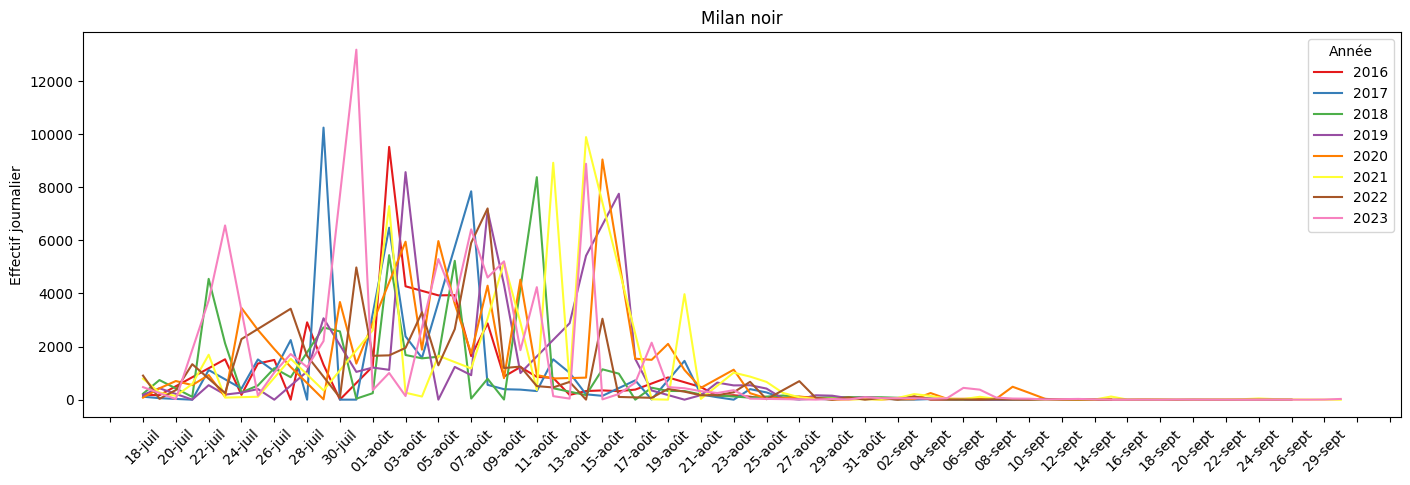

In [102]:
# Figure all years
plt.figure(figsize=(17, 5))

milan_noir_plot = sns.lineplot(data=milan_noir, x='day_month', y='direction1', hue='Année', palette='Set1');
plt.xticks(rotation=45);
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
milan_noir_plot.set(xlabel ="", ylabel = "Effectif journalier", title ="Milan noir");

#Save image to folder
fig = milan_noir_plot.get_figure()
fig.savefig('../figures/top_especes_rapaces_cigognes/distribution_phenologie/tous_les_ans/distribution_effectif_milan_noir_jour_tous_les_ans.png')

/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_33693/2152788239.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  milan_noir = milan_noir[sorted_species_sum_day['Année'].isin([year])]
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_33693/2152788239.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  milan_noir = milan_noir[sorted_species_sum_day['Année'].isin([year])]
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_33693/2152788239.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  milan_noir = milan_noir[sorted_species_sum_day['Année'].isin([year])]
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_33693/2152788239.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  milan_noir = milan_noir[sorted_species_sum_day['Année'].isin([year])]
/var/folders/p7/90k2qrqs4fvbt30f5t6x0glc0000gn/T/ipykernel_33693/2152788239.

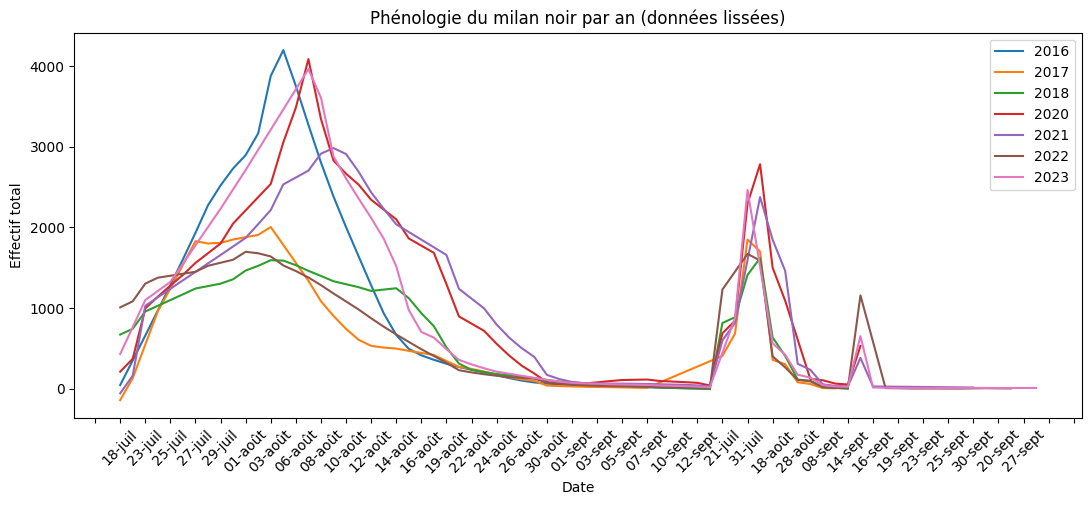

In [103]:
# Initialize the figure
plt.figure(figsize=(13, 5))

years = [2016, 2017, 2018, 2020, 2021, 2022, 2023]

# Loop through each year and plot the data
for year in years:

    milan_noir = sorted_species_sum_day[sorted_species_sum_day['species'].isin(['Milan noir'])]
    milan_noir = milan_noir[sorted_species_sum_day['Année'].isin([year])]

    milan_noir['day_float'] = np.linspace(1, len(milan_noir), num=len(milan_noir))

    x = np.array(milan_noir.day_float)
    y = np.array(milan_noir.direction1)
    z = sm.nonparametric.lowess(y, x, frac=1./3, it=3)

    # Plot the original data and the smoothed data
    #sns.lineplot(x=milan_noir['day_month'], y=y, label=f'Données originales {year}',  linestyle='--')
    sns.lineplot(x=milan_noir['day_month'], y=z[:, 1], label=year)

# Add labels and a title
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
plt.ylabel('Effectif total')
plt.title('Phénologie du milan noir par an (données lissées)')
plt.legend()

# Display the plot
plt.savefig('../figures/top_especes_rapaces_cigognes/distribution_phenologie/données_lissées/phenologie_donnees_lissees_milan_noir.png')

### Milan royal

In [85]:
milan_royal

,Année,date_dt,species,direction1,day_month
1205,2022,2022-07-18,Milan royal,1.0,18-juil
572,2019,2019-07-19,Milan royal,1.0,19-juil
1211,2022,2022-07-21,Milan royal,5.0,21-juil
390,2018,2018-07-23,Milan royal,1.0,23-juil
1454,2023,2023-07-23,Milan royal,1.0,23-juil
...,...,...,...,...,...
1727,2023,2023-10-12,Milan royal,39.0,12-oct
1202,2021,2021-10-13,Milan royal,835.0,13-oct
1447,2022,2022-10-13,Milan royal,241.0,13-oct
568,2018,2018-10-13,Milan royal,82.0,13-oct


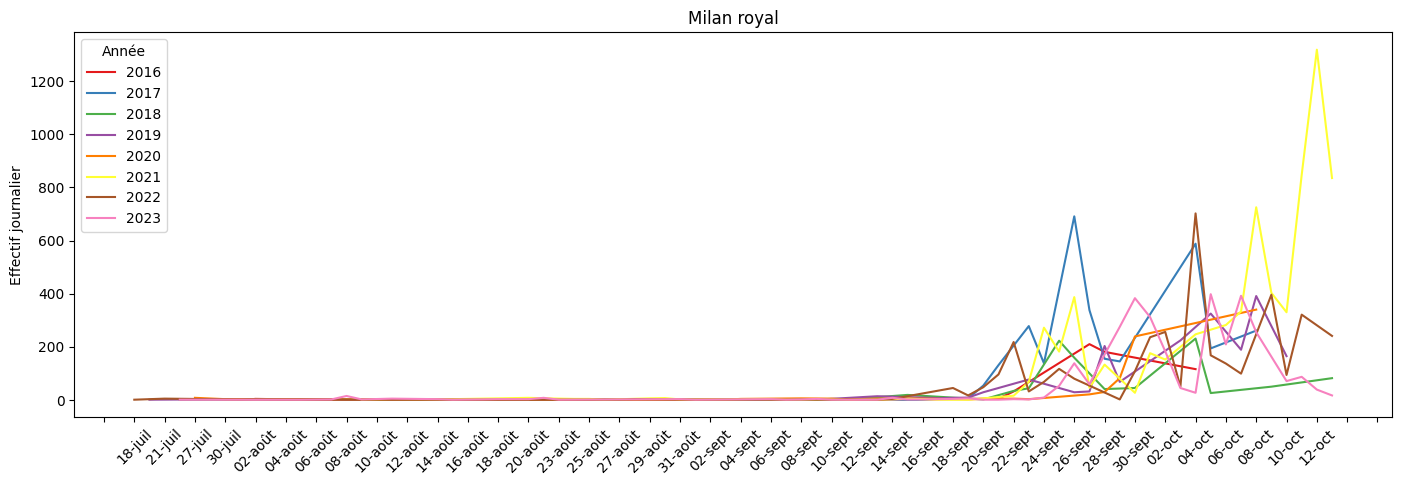

In [84]:
# Figure all years
plt.figure(figsize=(17, 5))

milan_royal_plot = sns.lineplot(data=milan_royal, x='day_month', y='direction1', hue='Année', palette='Set1');
plt.xticks(rotation=45);
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
milan_royal_plot.set(xlabel ="", ylabel = "Effectif journalier", title ="Milan royal");

#Save image to folder
fig = milan_royal_plot.get_figure()
fig.savefig('../figures/top_especes_rapaces_cigognes/distribution_phenologie/tous_les_ans/distribution_effectif_milan_royal_jour_tous_les_ans.png')

In [87]:
milan_royal_2020_to_2023 = milan_royal[milan_royal['Année'].isin([2020, 2021, 2022, 2023])]
milan_royal_2020_to_2023.head()

,Année,date_dt,species,direction1,day_month
1205,2022,2022-07-18,Milan royal,1.0,18-juil
1211,2022,2022-07-21,Milan royal,5.0,21-juil
1454,2023,2023-07-23,Milan royal,1.0,23-juil
776,2020,2020-07-27,Milan royal,8.0,27-juil
779,2020,2020-07-30,Milan royal,3.0,30-juil


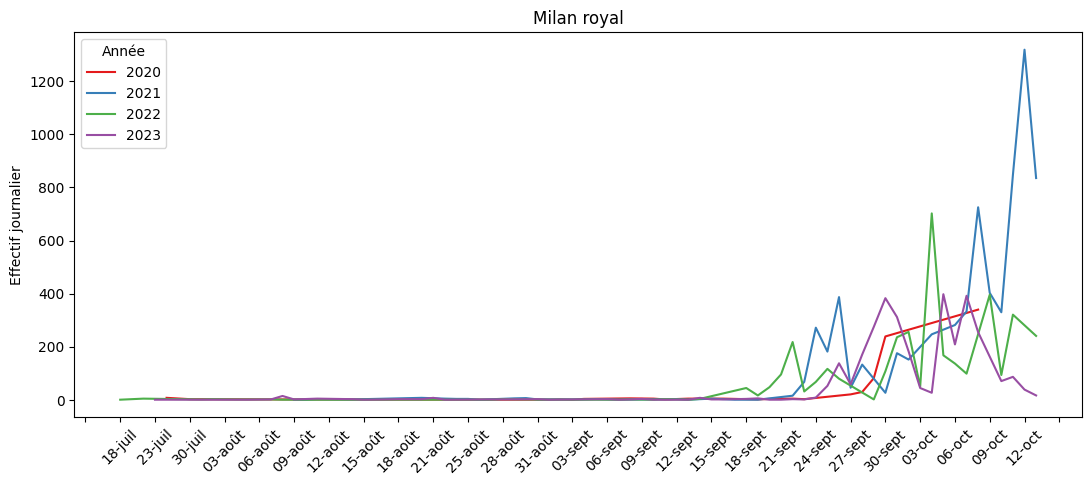

In [88]:
# Figure years 2020 to 2023
plt.figure(figsize=(13, 5))

milan_royal_2020_to_2023_plot = sns.lineplot(data=milan_royal_2020_to_2023, x='day_month', y='direction1', hue='Année', palette='Set1');
plt.xticks(rotation=45);
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3))
milan_royal_2020_to_2023_plot.set(xlabel ="", ylabel = "Effectif journalier", title ="Milan royal", label='Année');
fig = milan_royal_2020_to_2023_plot.get_figure()
fig.savefig('../figures/top_especes_rapaces_cigognes/distribution_phenologie/annees_2020_a_2023/distribution_effectif_milan_royal_jour_2020_2023.png')

### Bondrée apivore

In [89]:
bondree = sorted_species_sum_day[sorted_species_sum_day['species'].isin(['Bondrée apivore'])]
bondree.species.unique()

array(['Bondrée apivore'], dtype=object)

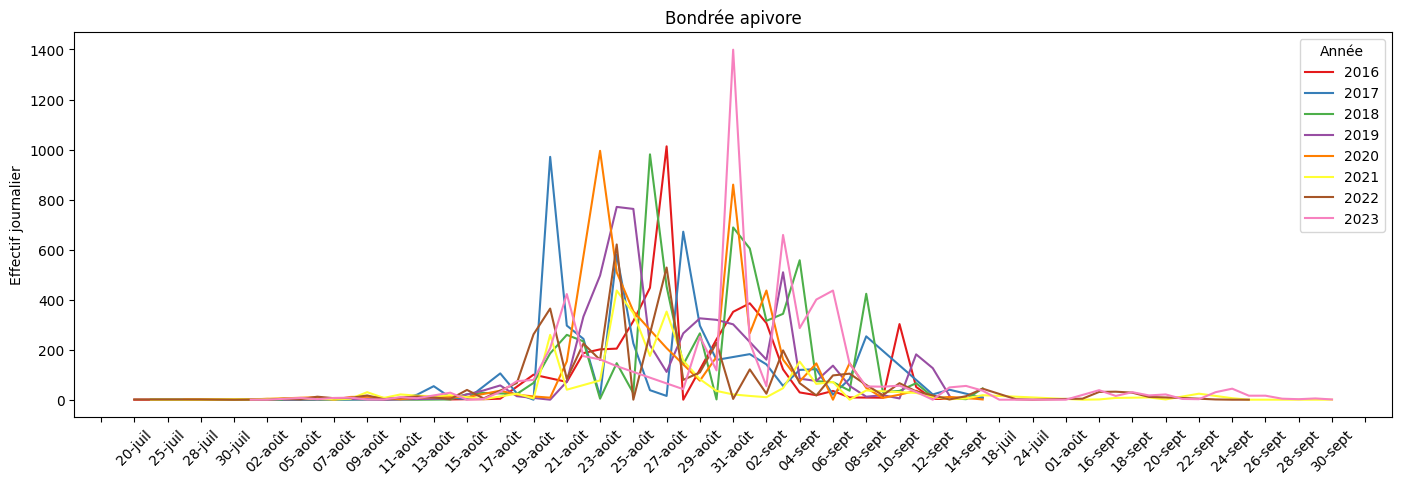

In [90]:
# Figure all years
plt.figure(figsize=(17, 5))

bondree_plot = sns.lineplot(data=bondree, x='day_month', y='direction1', hue='Année', palette='Set1');
plt.xticks(rotation=45);
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
bondree_plot.set(xlabel ="", ylabel = "Effectif journalier", title ="Bondrée apivore");

#Save image to folder
fig = bondree_plot.get_figure()
fig.savefig('../figures/top_especes_rapaces_cigognes/distribution_phenologie/tous_les_ans/distribution_effectif_bondree_jour_tous_les_ans.png')

In [91]:
bondree_2020_to_2023 = bondree[bondree['Année'].isin([2020, 2021, 2022, 2023])]
bondree_2020_to_2023.head()

,Année,date_dt,species,direction1,day_month
774,2020,2020-07-27,Bondrée apivore,2.0,27-juil
780,2020,2020-07-31,Bondrée apivore,2.0,31-juil
789,2020,2020-08-06,Bondrée apivore,11.0,06-août
791,2020,2020-08-07,Bondrée apivore,1.0,07-août
794,2020,2020-08-08,Bondrée apivore,12.0,08-août


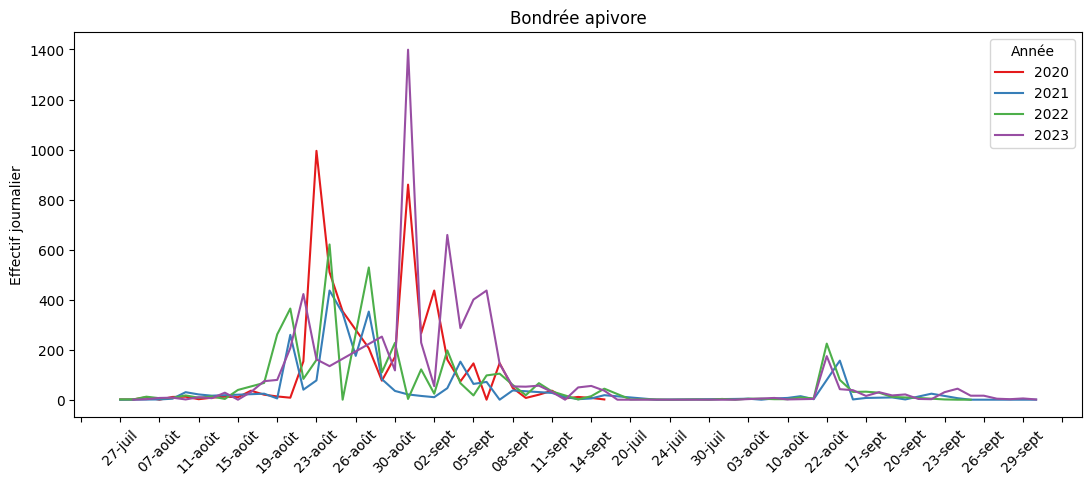

In [92]:
# Figure years 2020 to 2023
plt.figure(figsize=(13, 5))

bondree_2020_to_2023_plot = sns.lineplot(data=bondree_2020_to_2023, x='day_month', y='direction1', hue='Année', palette='Set1');
plt.xticks(rotation=45);
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3))
bondree_2020_to_2023_plot.set(xlabel ="", ylabel = "Effectif journalier", title ="Bondrée apivore", label='Année');
fig = bondree_2020_to_2023_plot.get_figure()
fig.savefig('../figures/top_especes_rapaces_cigognes/distribution_phenologie/annees_2020_a_2023/distribution_effectif_bondree_apivore_jour_2020_2023.png')

### Cigogne noire

In [66]:
cigogne_noire = sorted_species_sum_day[sorted_species_sum_day['species'].isin(['Cigogne noire'])]
cigogne_noire.species.unique()

array(['Cigogne noire'], dtype=object)

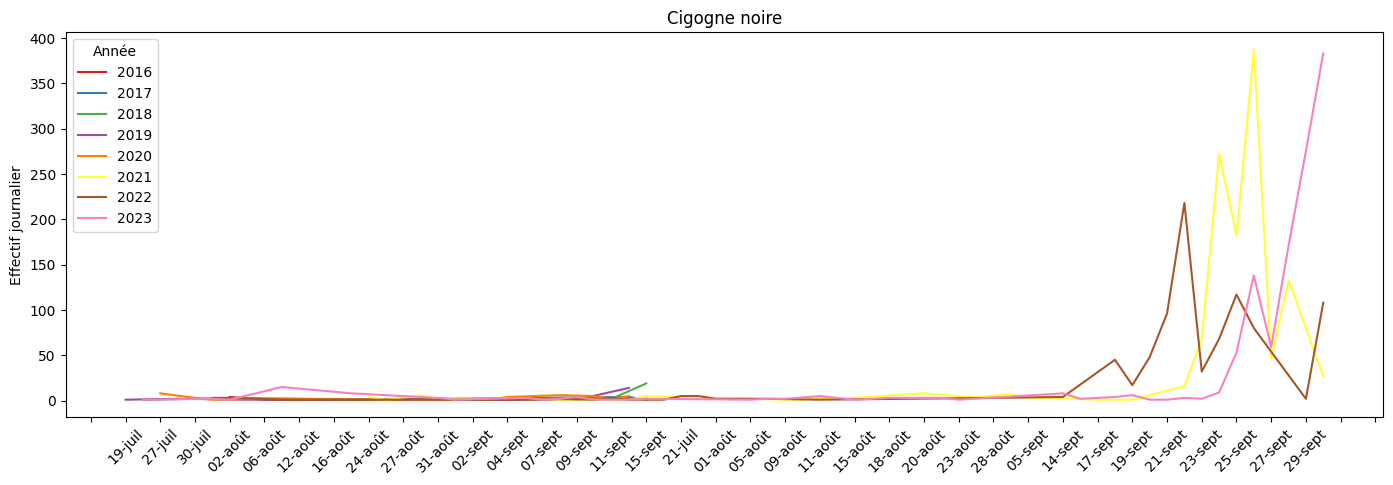

In [67]:
# Figure all years
plt.figure(figsize=(17, 5))

cigogne_noire_plot = sns.lineplot(data=milan_royal, x='day_month', y='direction1', hue='Année', palette='Set1');
plt.xticks(rotation=45);
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
cigogne_noire_plot.set(xlabel ="", ylabel = "Effectif journalier", title ="Cigogne noire");

#Save image to folder
fig = cigogne_noire_plot.get_figure()
fig.savefig('../figures/top_especes_rapaces_cigognes/distribution_phenologie/tous_les_ans/distribution_effectif_cigogne_noire_jour_tous_les_ans.png')

In [68]:
cigogne_noire_2020_to_2023 = cigogne_noire[cigogne_noire['Année'].isin([2020, 2021, 2022, 2023])]
cigogne_noire_2020_to_2023.head()

,Année,date_dt,species,direction1,day_month
781,2020,2020-07-31,Cigogne noire,1.0,31-juil
784,2020,2020-08-03,Cigogne noire,8.0,03-août
786,2020,2020-08-04,Cigogne noire,1.0,04-août
792,2020,2020-08-07,Cigogne noire,1.0,07-août
795,2020,2020-08-08,Cigogne noire,1.0,08-août


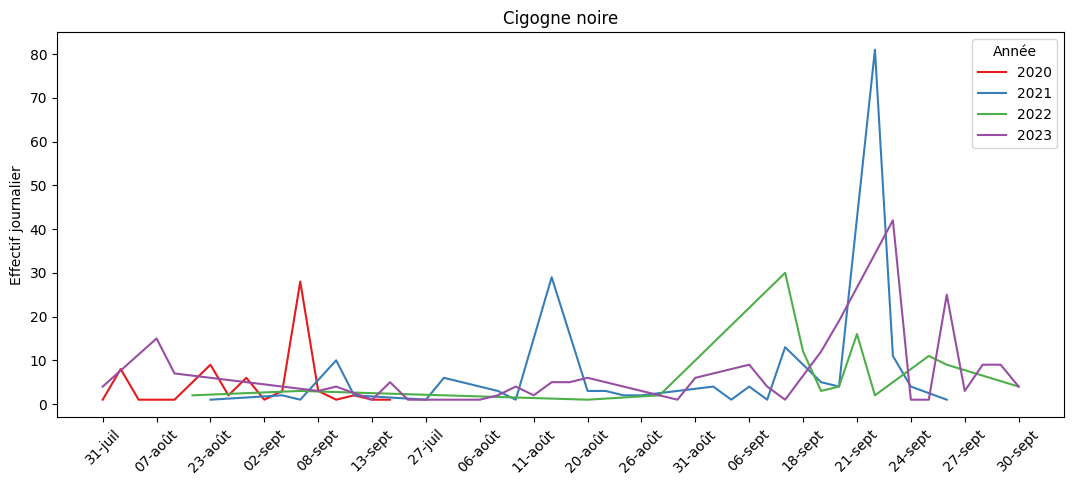

In [69]:
# Figure years 2020 to 2023
plt.figure(figsize=(13, 5))

cigogne_noire_2020_to_2023_plot = sns.lineplot(data=cigogne_noire_2020_to_2023, x='day_month', y='direction1', hue='Année', palette='Set1');
plt.xticks(rotation=45);
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3))
cigogne_noire_2020_to_2023_plot.set(xlabel ="", ylabel = "Effectif journalier", title ="Cigogne noire", label='Année');
fig = cigogne_noire_2020_to_2023_plot.get_figure()
fig.savefig('../figures/top_especes_rapaces_cigognes/distribution_phenologie/annees_2020_a_2023/distribution_effectif_cigogne_noire_jour_2020_2023.png')

### Cigogne blanche

In [70]:
cigogne_blanche = sorted_species_sum_day[sorted_species_sum_day['species'].isin(['Cigogne blanche'])]
cigogne_blanche.species.unique()

array(['Cigogne blanche'], dtype=object)

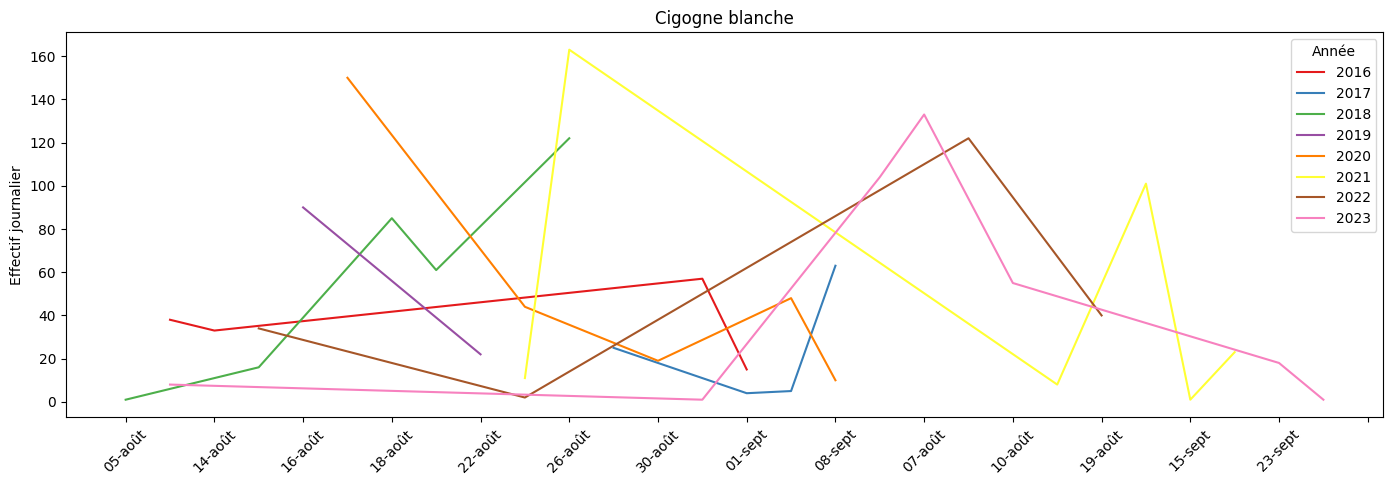

In [71]:
# Figure all years
plt.figure(figsize=(17, 5))

cigogne_blanche_plot = sns.lineplot(data=cigogne_blanche, x='day_month', y='direction1', hue='Année', palette='Set1');
plt.xticks(rotation=45);
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
cigogne_blanche_plot.set(xlabel ="", ylabel = "Effectif journalier", title ="Cigogne blanche");

#Save image to folder
fig = cigogne_blanche_plot.get_figure()
fig.savefig('../figures/top_especes_rapaces_cigognes/distribution_phenologie/tous_les_ans/distribution_effectif_cigogne_blanche_jour_tous_les_ans.png')

In [72]:
cigogne_blanche_2020_to_2023 = cigogne_blanche[cigogne_blanche['Année'].isin([2020, 2021, 2022, 2023])]
cigogne_blanche_2020_to_2023.head()

,Année,date_dt,species,direction1,day_month
813,2020,2020-08-17,Cigogne blanche,150.0,17-août
830,2020,2020-08-24,Cigogne blanche,44.0,24-août
845,2020,2020-08-30,Cigogne blanche,19.0,30-août
858,2020,2020-09-02,Cigogne blanche,48.0,02-sept
881,2020,2020-09-08,Cigogne blanche,10.0,08-sept


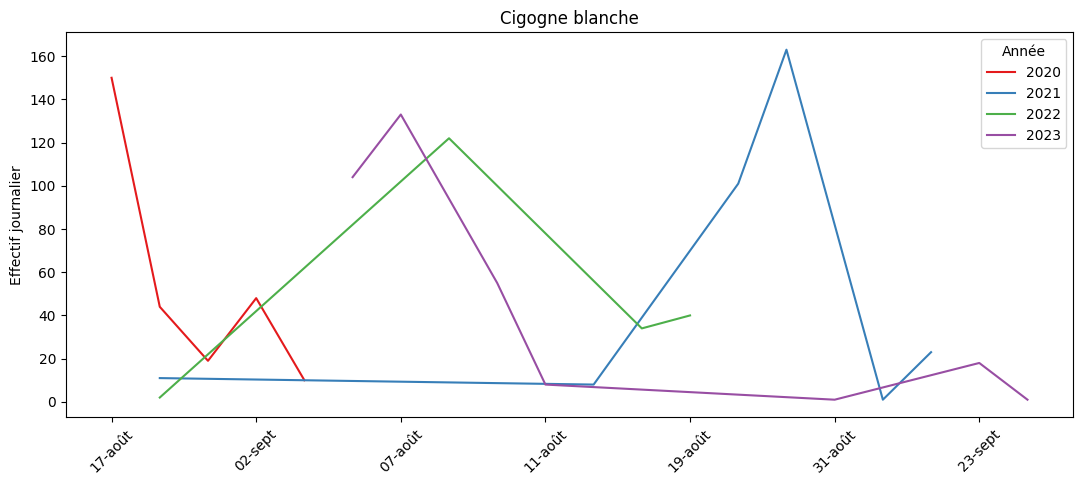

In [73]:
# Figure years 2020 to 2023
plt.figure(figsize=(13, 5))

cigogne_blanche_2020_to_2023_plot = sns.lineplot(data=cigogne_blanche_2020_to_2023, x='day_month', y='direction1', hue='Année', palette='Set1');
plt.xticks(rotation=45);
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3))
cigogne_blanche_2020_to_2023_plot.set(xlabel ="", ylabel = "Effectif journalier", title ="Cigogne blanche", label='Année');
fig = cigogne_blanche_2020_to_2023_plot.get_figure()
fig.savefig('../figures/top_especes_rapaces_cigognes/distribution_phenologie/annees_2020_a_2023/distribution_effectif_cigogne_blanche_jour_2020_2023.png')

### Epervier d'Europe

In [74]:
epervier = sorted_species_sum_day[sorted_species_sum_day['species'].isin(['Épervier d’Europe'])]
epervier.species.unique()

array(['Épervier d’Europe'], dtype=object)

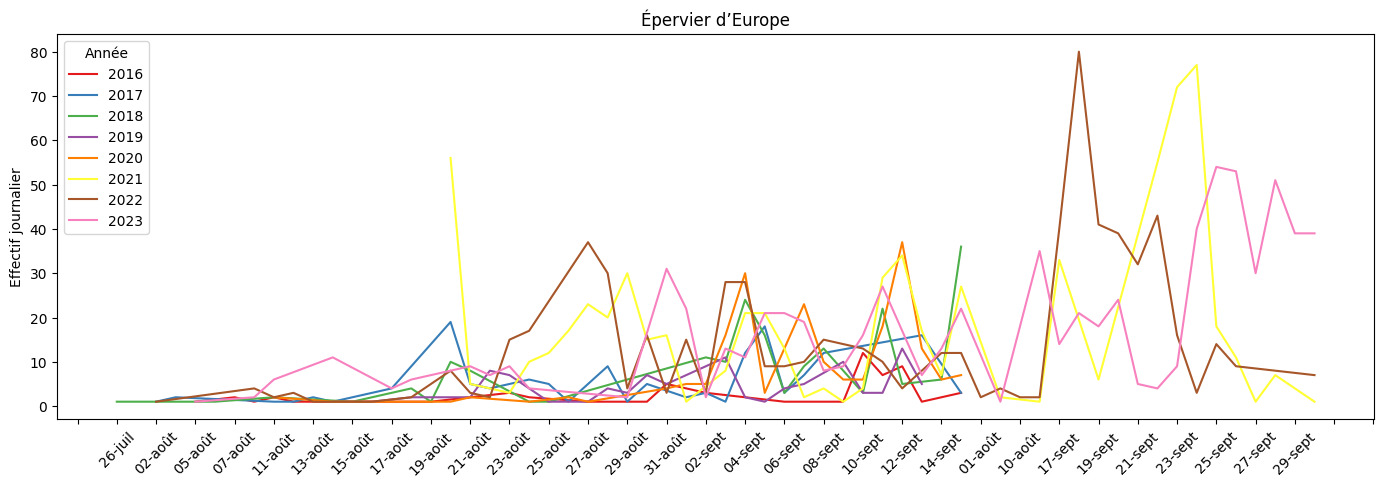

In [75]:
# Figure all years
plt.figure(figsize=(17, 5))

epervier_plot = sns.lineplot(data=epervier, x='day_month', y='direction1', hue='Année', palette='Set1');
plt.xticks(rotation=45);
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
epervier_plot.set(xlabel ="", ylabel = "Effectif journalier", title ="Épervier d’Europe");

#Save image to folder
fig = epervier_plot.get_figure()
fig.savefig('../figures/top_especes_rapaces_cigognes/distribution_phenologie/tous_les_ans/distribution_effectif_epervier_jour_tous_les_ans.png')

In [76]:
epervier_2020_to_2023 = epervier[epervier['Année'].isin([2020, 2021, 2022, 2023])]
epervier_2020_to_2023.head()

,Année,date_dt,species,direction1,day_month
803,2020,2020-08-11,Épervier d’Europe,2.0,11-août
809,2020,2020-08-14,Épervier d’Europe,1.0,14-août
817,2020,2020-08-18,Épervier d’Europe,1.0,18-août
822,2020,2020-08-20,Épervier d’Europe,1.0,20-août
825,2020,2020-08-21,Épervier d’Europe,2.0,21-août


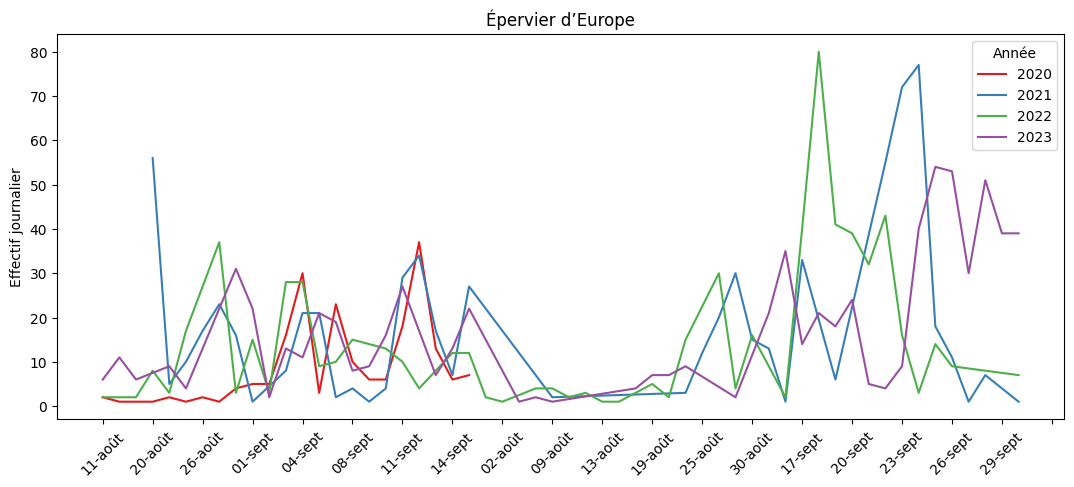

In [77]:
# Figure years 2020 to 2023
plt.figure(figsize=(13, 5))

epervier_2020_to_2023_plot = sns.lineplot(data= epervier_2020_to_2023, x='day_month', y='direction1', hue='Année', palette='Set1');
plt.xticks(rotation=45);
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(3))
epervier_2020_to_2023_plot.set(xlabel ="", ylabel = "Effectif journalier", title ="Épervier d’Europe", label='Année');
fig = epervier_2020_to_2023_plot.get_figure()
fig.savefig('../figures/top_especes_rapaces_cigognes/distribution_phenologie/annees_2020_a_2023/distribution_effectif_epervier_jour_2020_2023.png')